# Configuration

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#per comparison
dire='/project/Neurodifferentiation_System/Analysis_NGN3/AS_rMATS/Results/'
plot_dir_out='/project/Neurodifferentiation_System/owlmayerTemporary/derek/isoSwitch/Plots/'


days=["day"+str(i) for i in range(4)]+["day5"]

direction={1:'skipped',-1:'retained'}



# Pie chart with rMATS result

## Four subsequent state transitions

/scratch/local/ipykernel_79464/304870724.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupby('Alternative splicing event').sum()
/scratch/local/ipykernel_79464/304870724.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupby('Alternative splicing event').sum()
/scratch/local/ipykernel_79464/304870724.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupb

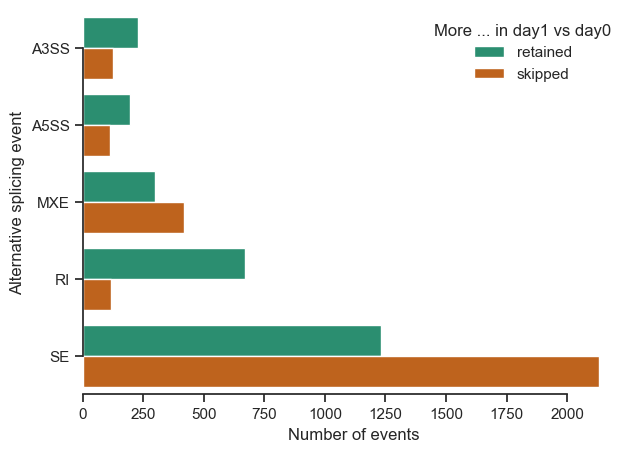

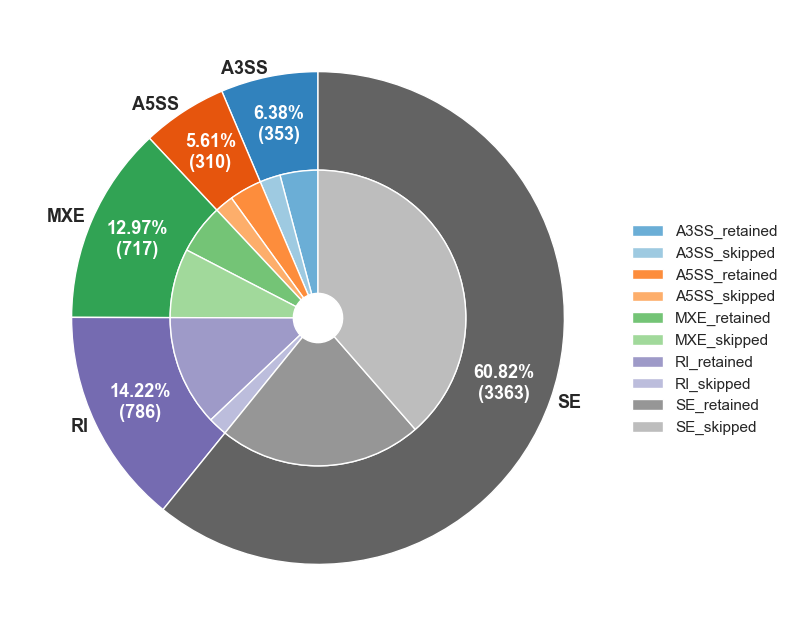

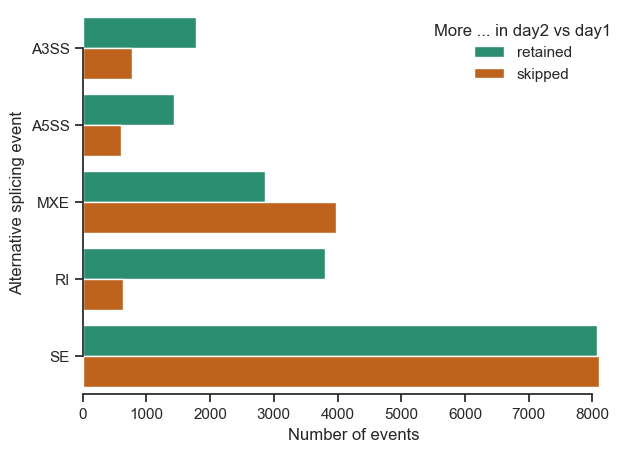

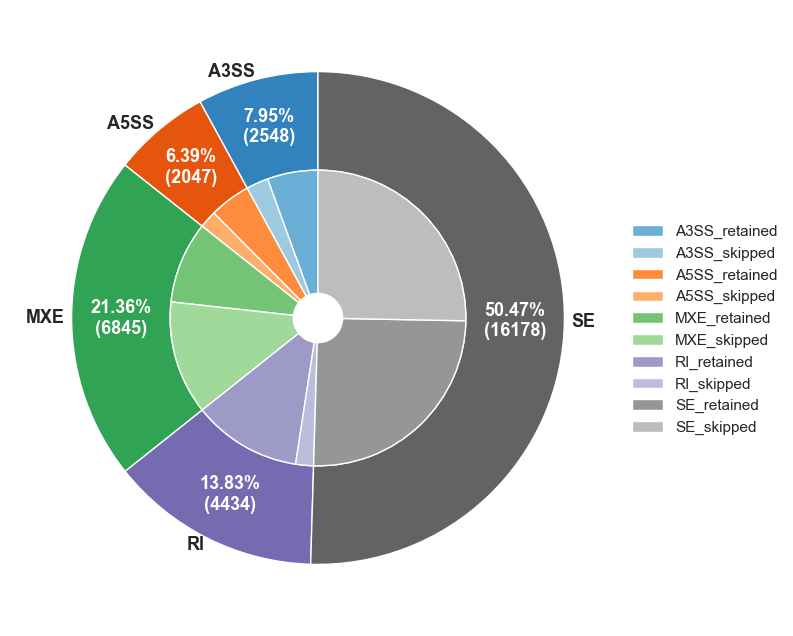

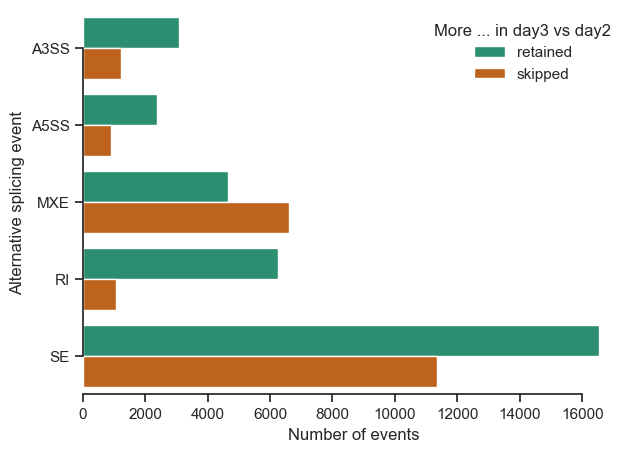

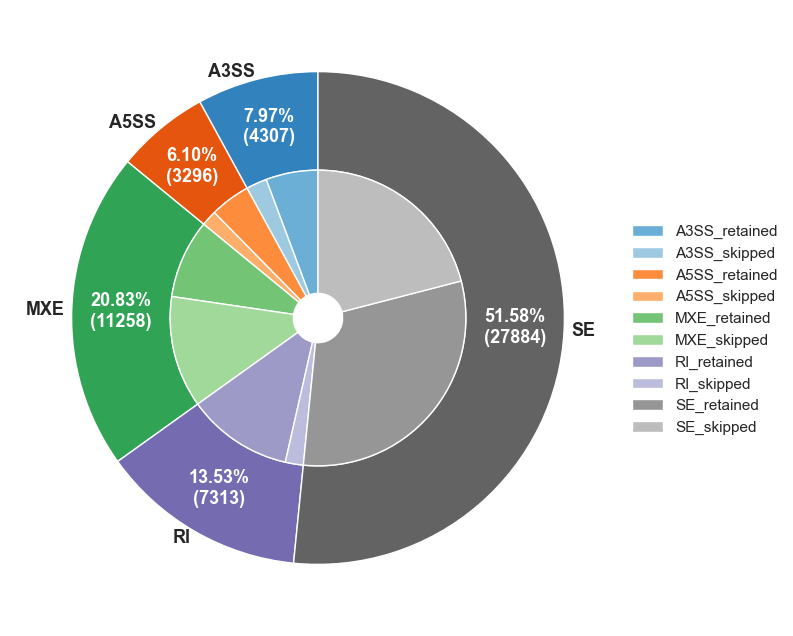

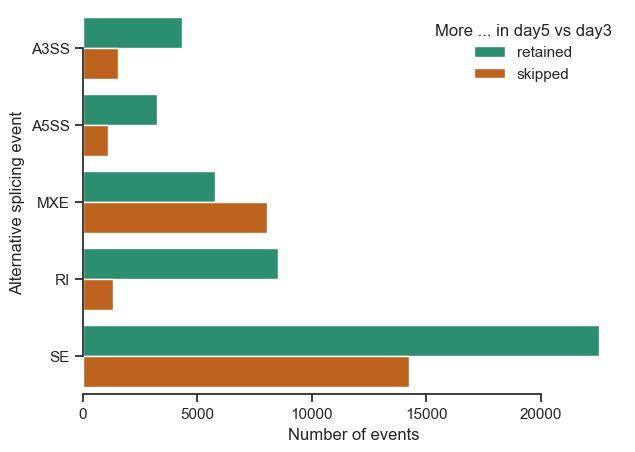

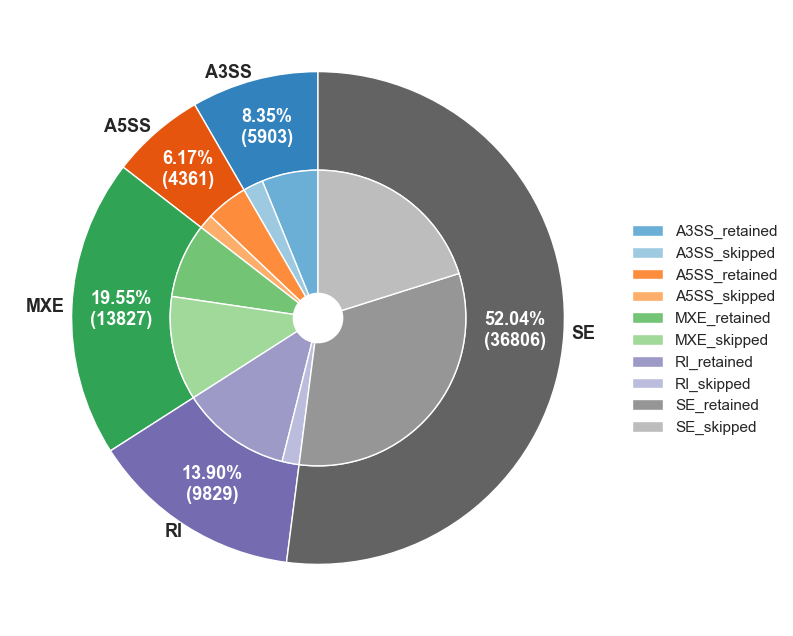

In [220]:
for i in range(len(days)-1):
    control=days[i]
    
    condition=days[i+1]
    df=pd.read_csv(dire+'%s_background_%s/SummaryJC.csv'%(condition,control))
    summary=df.groupby(['eventType','incDirection']).count()
    summary=summary.reset_index()
    summary=summary.rename(columns={'geneSymbol':'Number of events',
                                       'incDirection':'More ... in '+condition+' vs '+control,
                                       'eventType':'Alternative splicing event'})
    summary['More ... in '+condition+' vs '+control]=summary.apply(lambda x:direction[x['More ... in '+condition+' vs '+control]],1)
    plt.figure()
    sns.set(rc={'figure.figsize':(7,5), 'legend.frameon':False})
    sns.set_style("ticks")
    ax=sns.barplot(y='Alternative splicing event',
                    x='Number of events',
                    hue='More ... in '+condition+' vs '+control,
                    data=summary,palette="Dark2")
    sns.despine(trim=True,bottom=False)
    plt.savefig(plot_dir_out+'bar_%s_vs_%s.pdf'%(condition,control))
    
    outer = summary.groupby('Alternative splicing event').sum(numeric_only = True)
    inner = summary.groupby(['Alternative splicing event', 'More ... in '+condition+' vs '+control]).sum(numeric_only = True)
    inner_labels = inner.index.get_level_values(1)


    # Creating color scale
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(5)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

    def my_fmt(x):
        return '{:.1f}%\n({:.0f})'.format(x, sum(outer.values.flatten())*x/100)

    fig, ax = plt.subplots(figsize =(10, 8))
    # First Ring (outside)
    _,_, autotexts = plt.pie(outer.values.flatten(), radius=1, labels=outer.index, 
                       colors= outer_colors, autopct=my_fmt,
            startangle=90, pctdistance =0.8,
            labeldistance=1.03,
           textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops=dict(width=0.4, edgecolor='w'))
    for autotext in autotexts:
        autotext.set_color('white')
    
    # Second Ring (inside)
    wedges, _ = ax.pie(inner.values.flatten(), radius=1-0.4, 
                   # labels=inner_labels, labeldistance=0.5, 
                   colors=inner_colors, 
        startangle=90, pctdistance =0.85,
      wedgeprops=dict(width=0.5, edgecolor='w'))

    subgroup_names_legs = []
    for i in range(len(outer.index)):
        for j in range(2):
            subgroup_names_legs.append(outer.index[i]+'_'+inner_labels[j]) 

    plt.legend(wedges, subgroup_names_legs, loc=(1, 0.3))

    # show it
    plt.savefig(plot_dir_out+'pie_%s_vs_%s.pdf'%(condition,control))



## Overall

In [20]:
#overall AS events
df=pd.read_csv(dire+'%s_background_%s/SummaryJC.csv'%(days[1], days[0]))
for i in range(1,len(days)-1):
    control=days[i]

    condition=days[i+1]
    temp=pd.read_csv(dire+'%s_background_%s/SummaryJC.csv'%(condition,control))
    df = pd.concat([df, temp], ignore_index=True, axis=0)
    
    
    
    
df    
   

,eventType,geneSymbol,incDirection
0,SE,TXLNGY,1
1,SE,FLNA,-1
2,SE,FLNA,1
3,SE,RENBP,1
4,SE,NSDHL,1
...,...,...,...
162360,RI,PIGT,-1
162361,RI,PSMC4,-1
162362,RI,PSMC4,-1
162363,RI,ELMO2,-1


In [21]:
len(df["geneSymbol"].unique())

8415

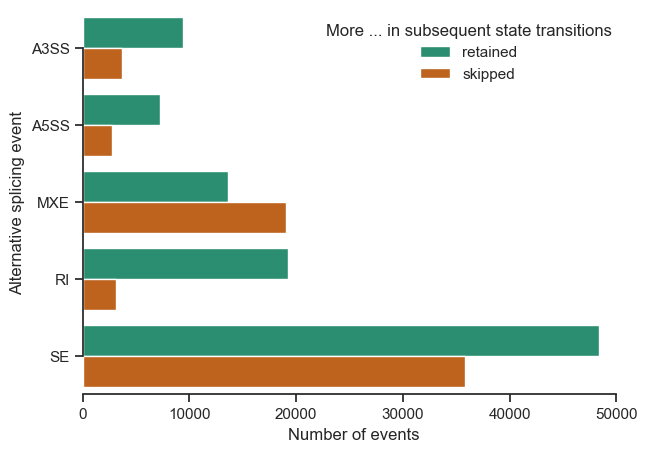

In [22]:
summary=df.groupby(['eventType','incDirection']).count()
summary=summary.reset_index()
summary=summary.rename(columns={'geneSymbol':'Number of events',
                                       'incDirection':'More ... in subsequent state transitions',
                                       'eventType':'Alternative splicing event'})
summary['More ... in subsequent state transitions']=summary.apply(lambda x:direction[x['More ... in subsequent state transitions']],1)
plt.figure()
sns.set(rc={'figure.figsize':(7,5), 'legend.frameon':False})
sns.set_style("ticks")
ax=sns.barplot(y='Alternative splicing event',
                x='Number of events',
                hue='More ... in subsequent state transitions',
                data=summary,palette="Dark2")
sns.despine(trim=True,bottom=False)
plt.savefig(plot_dir_out+'bar_overall_subsequent_AS_type.pdf')
        


/scratch/local/ipykernel_79464/3371036149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupby('Alternative splicing event').sum()


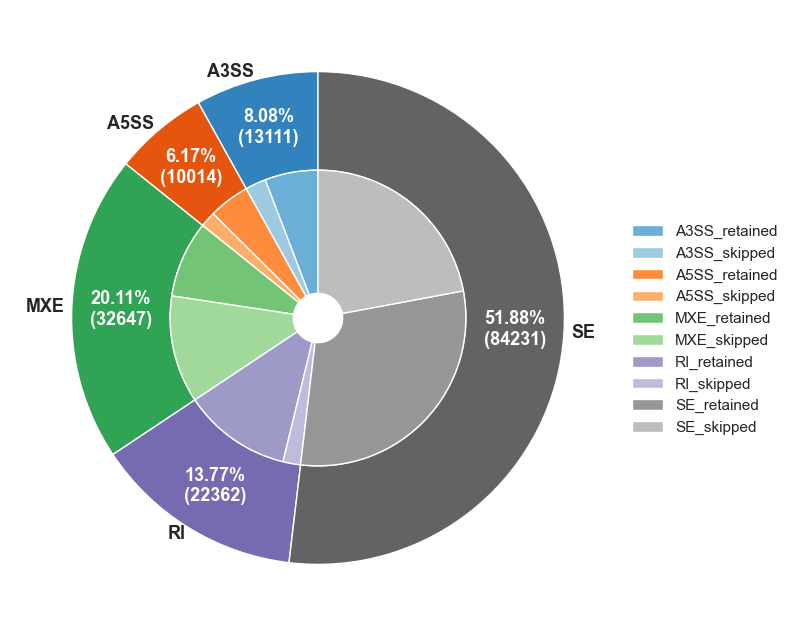

In [219]:
outer = summary.groupby('Alternative splicing event').sum(numeric_only = True)
inner = summary.groupby(['Alternative splicing event', 'More ... in subsequent state transitions']).sum(numeric_only = True)
inner_labels = inner.index.get_level_values(1)


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, sum(outer.values.flatten())*x/100)

fig, ax = plt.subplots(figsize =(10, 8))
# First Ring (outside)
_,_, autotexts = ax.pie(outer.values.flatten(), radius=1, labels=outer.index, 
                   colors= outer_colors, autopct=my_fmt,
        startangle=90, pctdistance =0.8,
        labeldistance=1.03,
       textprops ={ 'fontweight': 'bold','fontsize':13},
      wedgeprops=dict(width=0.4, edgecolor='w'))

for autotext in autotexts:
    autotext.set_color('white')

# Second Ring (inside)
wedges, _ = ax.pie(inner.values.flatten(), radius=1-0.4, 
                   # labels=inner_labels, labeldistance=0.5, rotatelabels = True,
                   colors=inner_colors, 
        startangle=90, pctdistance =0.85,
      wedgeprops=dict(width=0.5, edgecolor='w'))

subgroup_names_legs = []
for i in range(len(outer.index)):
    for j in range(2):
        subgroup_names_legs.append(outer.index[i]+'_'+inner_labels[j]) 

# handles, labels = ax.get_legend_handles_labels()
# print(labels)
# plt.legend(handles[5:], subgroup_names_legs, loc=(1, 0.3))
plt.legend(wedges, subgroup_names_legs, loc=(1, 0.3))

# show it
plt.savefig(plot_dir_out+'pie_overall_subsequent.pdf')

In [121]:
sum(outer.values.flatten())

162365

# Pie chart with IsoformswitchAnalyzeR result

## Four subsequent state transitions

In [3]:
#IsoformswitchAnalyseR results with more AS types
data_dir = '/project/Neurodifferentiation_System/owlmayerTemporary/derek/isoSwitch/Results/'
df=pd.read_csv(data_dir+'AS_type_summary.csv', index_col=0)


In [4]:
df

,Comparison,AStype,splicingResult,nrGenesWithConsequences,nrIsoWithConsequences
1,day0 vs day1,A3,A3 in isoform used less,565,621
2,day0 vs day2,A3,A3 in isoform used less,1452,1599
3,day0 vs day3,A3,A3 in isoform used less,2331,2639
4,day0 vs day5,A3,A3 in isoform used less,3877,4751
5,day1 vs day2,A3,A3 in isoform used less,189,194
...,...,...,...,...,...
156,day1 vs day3,MES,MES in isoform used more,489,521
157,day1 vs day5,MES,MES in isoform used more,1109,1219
158,day2 vs day3,MES,MES in isoform used more,212,220
159,day2 vs day5,MES,MES in isoform used more,935,1024


In [5]:
df = df.iloc[:, [0,1,2,4]]
df

,Comparison,AStype,splicingResult,nrIsoWithConsequences
1,day0 vs day1,A3,A3 in isoform used less,621
2,day0 vs day2,A3,A3 in isoform used less,1599
3,day0 vs day3,A3,A3 in isoform used less,2639
4,day0 vs day5,A3,A3 in isoform used less,4751
5,day1 vs day2,A3,A3 in isoform used less,194
...,...,...,...,...
156,day1 vs day3,MES,MES in isoform used more,521
157,day1 vs day5,MES,MES in isoform used more,1219
158,day2 vs day3,MES,MES in isoform used more,220
159,day2 vs day5,MES,MES in isoform used more,1024


/scratch/local/ipykernel_54645/1734286555.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupby('AStype').sum()
/scratch/local/ipykernel_54645/1734286555.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inner = summary.groupby(['AStype', 'splicingResult']).sum()
/scratch/local/ipykernel_54645/1734286555.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = summary.groupby('AStype').sum()
/s

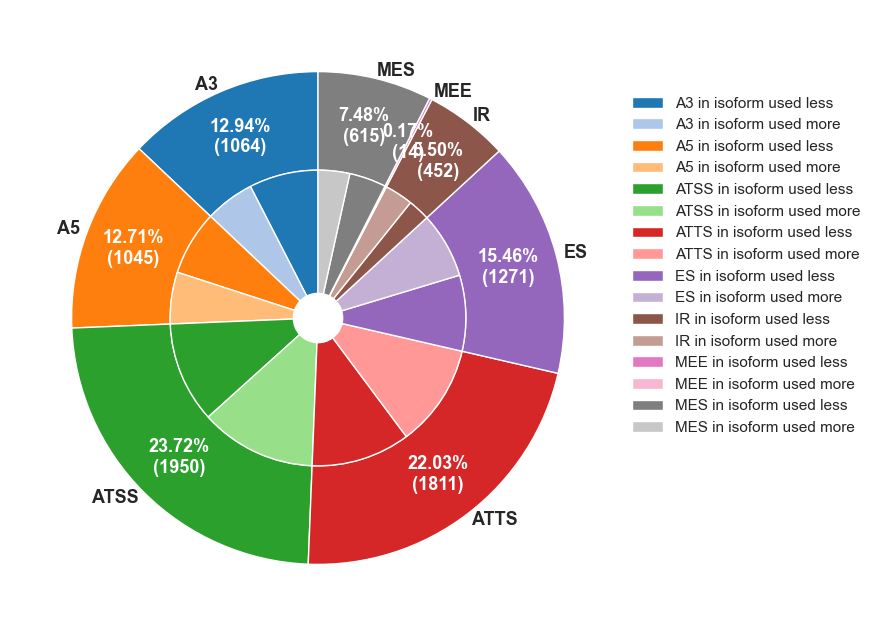

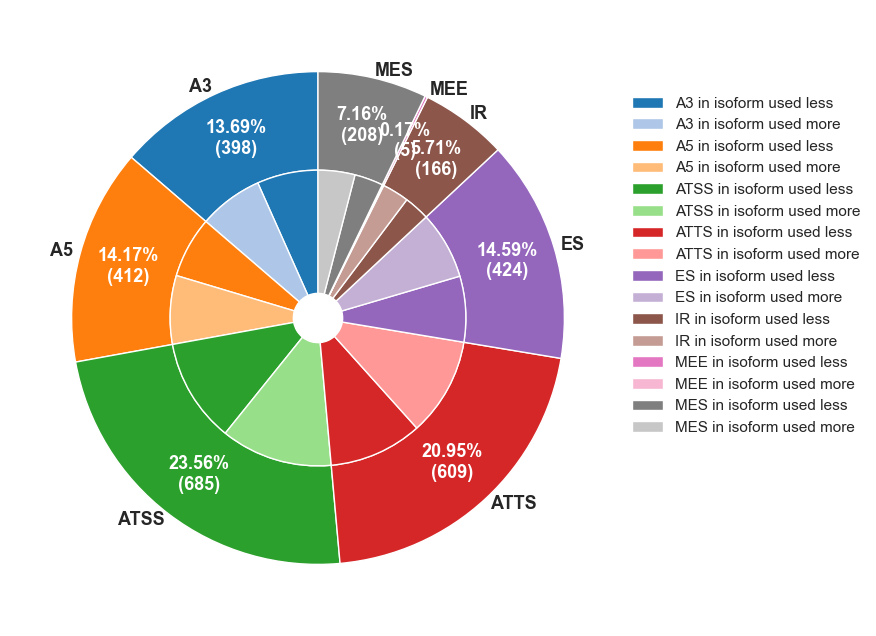

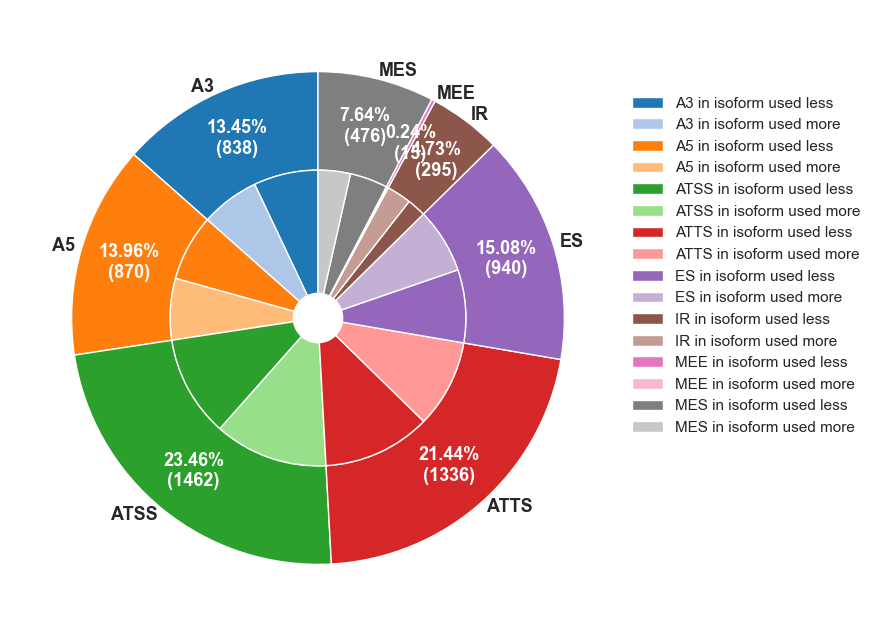

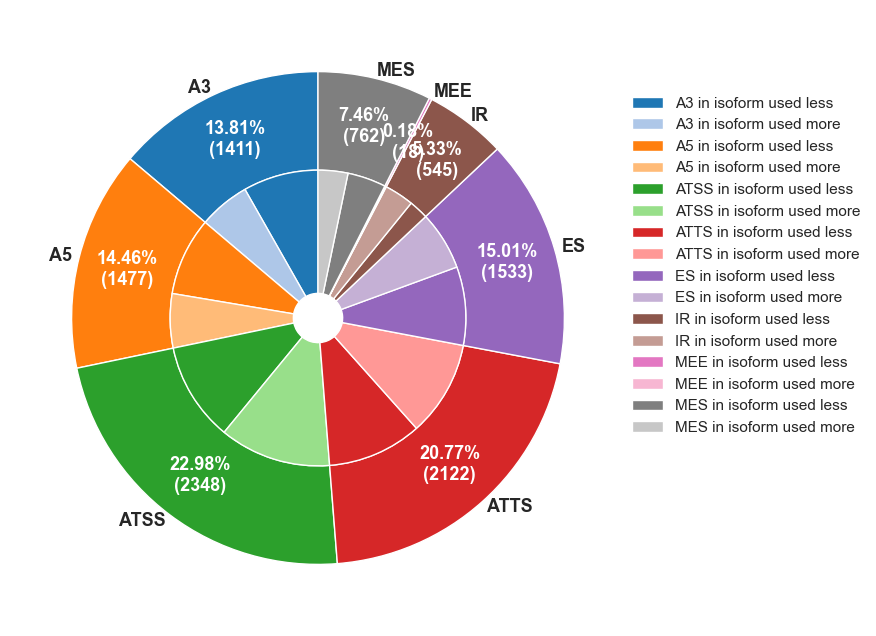

In [91]:
for i in range(len(days)-1):
    control=days[i]
    
    condition=days[i+1]
    summary = df[df['Comparison'] == '%s vs %s'%(control, condition)]
    
    outer = summary.groupby('AStype').sum(numeric_only = True)
    inner = summary.groupby(['AStype', 'splicingResult']).sum(numeric_only = True)
    
    # Creating color scale
    cmap = plt.get_cmap("tab20")
    outer_colors = cmap(np.arange(8)*2)
    inner_colors = cmap(np.array(list(range(0,16))))

    def my_fmt(x):
        return '{:.1f}%\n({:.0f})'.format(x, sum(outer.values.flatten())*x/100)

    fig, ax = plt.subplots(figsize =(10, 8))
    # First Ring (outside)
    _,_, autotexts = ax.pie(outer.values.flatten(), radius=1, labels=outer.index, 
                       colors= outer_colors, autopct=my_fmt,
            startangle=90, pctdistance =0.8,
            labeldistance=1.03,
           textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops=dict(width=0.4, edgecolor='w'))

    for autotext in autotexts:
        autotext.set_color('white')

    # Second Ring (inside)
    wedges, _ = ax.pie(inner.values.flatten(), radius=1-0.4, 
                       # labels=inner_labels, labeldistance=0.5, rotatelabels = True,
                       colors=inner_colors, 
            startangle=90, pctdistance =0.85,
          wedgeprops=dict(width=0.5, edgecolor='w'))

    subgroup_names_legs = list(inner.index.get_level_values(1))

    # handles, labels = ax.get_legend_handles_labels()
    # print(labels)
    # plt.legend(handles[5:], subgroup_names_legs, loc=(1, 0.3))
    plt.legend(wedges, subgroup_names_legs, loc=(1, 0.3))

    plt.savefig(plot_dir_out+'pie_%s_vs_%s_IsoformswitchAnalyzeR.pdf'%(condition,control))


## Overall

In [6]:
#overall AS events
summary=df[df['Comparison'] == '%s vs %s'%(days[0], days[1])]
for i in range(1,len(days)-1):
    control=days[i]

    condition=days[i+1]
    temp=df[df['Comparison'] == '%s vs %s'%(control, condition)]
    summary = pd.concat([summary, temp], ignore_index=True, axis=0)
    
summary    

,Comparison,AStype,splicingResult,nrIsoWithConsequences
0,day0 vs day1,A3,A3 in isoform used less,621
1,day0 vs day1,A3,A3 in isoform used more,443
2,day0 vs day1,A5,A5 in isoform used less,580
3,day0 vs day1,A5,A5 in isoform used more,465
4,day0 vs day1,ATSS,ATSS in isoform used less,907
...,...,...,...,...
59,day3 vs day5,IR,IR in isoform used more,328
60,day3 vs day5,MEE,MEE in isoform used less,8
61,day3 vs day5,MEE,MEE in isoform used more,10
62,day3 vs day5,MES,MES in isoform used less,429


In [7]:
sum(summary.iloc[:,3])

27577

In [18]:
outer = summary.groupby('AStype').sum(numeric_only = True)
inner = summary.groupby(['AStype', 'splicingResult']).sum(numeric_only = True)
   

In [19]:
outer

,nrIsoWithConsequences
AStype,
A3,3711
A5,3804
ATSS,6445
ATTS,5878
ES,4168
IR,1458
MEE,52
MES,2061


In [20]:
outer.values.flatten()

array([3711, 3804, 6445, 5878, 4168, 1458,   52, 2061])

In [21]:
outer.index 

Index(['A3', 'A5', 'ATSS', 'ATTS', 'ES', 'IR', 'MEE', 'MES'], dtype='object', name='AStype')

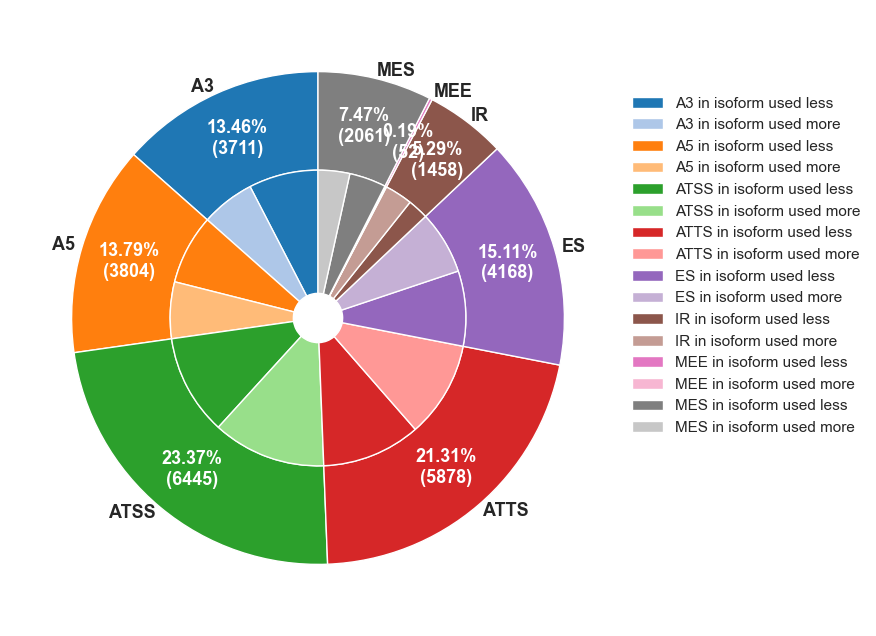

In [104]:
# Creating color scale
cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(8)*2)
inner_colors = cmap(np.array(list(range(0,16))))

def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, sum(outer.values.flatten())*x/100)

fig, ax = plt.subplots(figsize =(10, 8))
# First Ring (outside)
_,_, autotexts = ax.pie(outer.values.flatten(), radius=1, labels=outer.index, 
                   colors= outer_colors, autopct=my_fmt,
        startangle=90, pctdistance =0.8,
        labeldistance=1.03,
       textprops ={ 'fontweight': 'bold','fontsize':13},
      wedgeprops=dict(width=0.4, edgecolor='w'))

for autotext in autotexts:
    autotext.set_color('white')

# Second Ring (inside)
wedges, _ = ax.pie(inner.values.flatten(), radius=1-0.4, 
                   # labels=inner_labels, labeldistance=0.5, rotatelabels = True,
                   colors=inner_colors, 
        startangle=90, pctdistance =0.85,
      wedgeprops=dict(width=0.5, edgecolor='w'))

subgroup_names_legs = list(inner.index.get_level_values(1))

# handles, labels = ax.get_legend_handles_labels()
# print(labels)
# plt.legend(handles[5:], subgroup_names_legs, loc=(1, 0.3))
plt.legend(wedges, subgroup_names_legs, loc=(1, 0.3))
plt.savefig(plot_dir_out+'pie_overall_subsequent_IsoformswitchAnalyzeR.pdf')

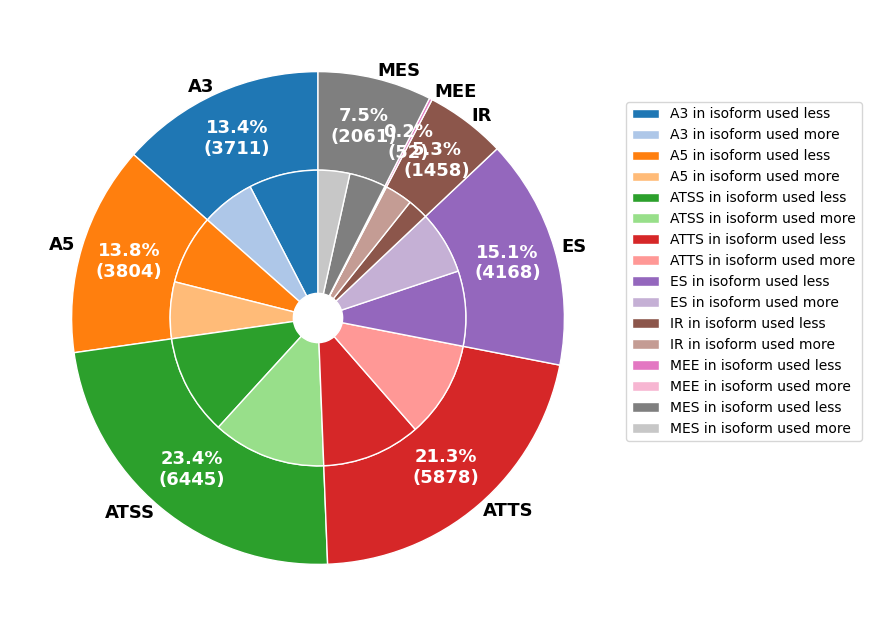

In [31]:
# Creating color scale
cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(8)*2)
inner_colors = cmap(np.array(list(range(0,16))))

def my_fmt(x):
    if x > 13.4 and x < 13.5:
        return '{:.1f}%\n({:.0f})'.format(x-0.1, sum(outer.values.flatten())*x/100)
    else:
        return '{:.1f}%\n({:.0f})'.format(x, sum(outer.values.flatten())*x/100)
    

fig, ax = plt.subplots(figsize =(10, 8))
# First Ring (outside)
_,_, autotexts = ax.pie(outer.values.flatten(), radius=1, labels=outer.index, 
                   colors= outer_colors, autopct=my_fmt,
        startangle=90, pctdistance =0.8,
        labeldistance=1.03,
       textprops ={ 'fontweight': 'bold','fontsize':13},
      wedgeprops=dict(width=0.4, edgecolor='w'))

for autotext in autotexts:
    autotext.set_color('white')

# Second Ring (inside)
wedges, _ = ax.pie(inner.values.flatten(), radius=1-0.4, 
                   # labels=inner_labels, labeldistance=0.5, rotatelabels = True,
                   colors=inner_colors, 
        startangle=90, pctdistance =0.85,
      wedgeprops=dict(width=0.5, edgecolor='w'))

subgroup_names_legs = list(inner.index.get_level_values(1))

# handles, labels = ax.get_legend_handles_labels()
# print(labels)
# plt.legend(handles[5:], subgroup_names_legs, loc=(1, 0.3))
plt.legend(wedges, subgroup_names_legs, loc=(1, 0.3))
plt.savefig(plot_dir_out+'pie_overall_subsequent_IsoformswitchAnalyzeR.pdf')